<a href="https://colab.research.google.com/github/RMoulla/PBD_Octobre/blob/main/ACP_M%C3%A9t%C3%A9o_Correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Travaux Pratiques : Analyse en Composantes Principales sur des données météo

Dans ce TP, nous allons voir une application pratique de l'Analyse en Composantes Principales (ACP) sur des données météo. L'ACP est essentiellement utilisée pour la réduction de la dimension d'un problème, en projetant sur une espace plus petit, tout en conservant un mximum d'information. Elle est souvent utilisée à des fins de visualisation de données grande dimension, projetées sur un espace de dimension 2.

Le processus d'application de l'ACP se décline selon les étapes suivantes :

* Standardisation : Les données sont standardisées pour avoir une moyenne de zéro et une variance de un. Cela est crucial pour garantir que toutes les variables contribuent également à l'analyse, indépendamment de leur échelle.

* Matrice de Covariance : On calcule la matrice de covariance des données pour identifier les corrélations entre les variables.

* Valeurs Propres et Vecteurs Propres : On détermine les valeurs propres et les vecteurs propres de la matrice de covariance. Les valeurs propres indiquent l'ampleur de la variance capturée par chaque composante principale, tandis que les vecteurs propres indiquent la direction de ces composantes dans l'espace des données.

* Choix des Composantes : On sélectionne le nombre de composantes principales à conserver. Dans ce tutoriel, nous nous concentrerons sur deux composantes principales pour faciliter la visualisation et l'interprétation.

* Transformation des Données : Les données originales sont transformées dans le nouvel espace de dimensions réduites en utilisant les vecteurs propres sélectionnés. Cela crée un ensemble de données de dimensions inférieures qui capture la majorité de la variance des données originales.



In [ ]:
import pandas as pd
data = pd.read_csv('meteo.csv')

# Suppression des colonnes spécifiées
columns_to_drop = ['Unnamed: 0', 'Hour', 'Minute', 'Day', 'Year', 'Month']
data_dropped = data.drop(columns=columns_to_drop)

# Isolation de la variable 'pluie.demain' et suppression de celle-ci du dataset principal
target_variable = data_dropped['pluie.demain']
data_dropped = data_dropped.drop(['pluie.demain'], axis=1)

# Affichage des premières lignes du dataset modifié
data_dropped.head()

,Temperature.daily.mean..2.m.above.gnd.,Relative.Humidity.daily.mean..2.m.above.gnd.,Mean.Sea.Level.Pressure.daily.mean..MSL.,Total.Precipitation.daily.sum..sfc.,Snowfall.amount.raw.daily.sum..sfc.,Total.Cloud.Cover.daily.mean..sfc.,High.Cloud.Cover.daily.mean..high.cld.lay.,Medium.Cloud.Cover.daily.mean..mid.cld.lay.,Low.Cloud.Cover.daily.mean..low.cld.lay.,Sunshine.Duration.daily.sum..sfc.,...,Low.Cloud.Cover.daily.max..low.cld.lay.,Low.Cloud.Cover.daily.min..low.cld.lay.,Wind.Speed.daily.max..10.m.above.gnd.,Wind.Speed.daily.min..10.m.above.gnd.,Wind.Speed.daily.max..80.m.above.gnd.,Wind.Speed.daily.min..80.m.above.gnd.,Wind.Speed.daily.max..900.mb.,Wind.Speed.daily.min..900.mb.,Wind.Gust.daily.max..sfc.,Wind.Gust.daily.min..sfc.
0,13.45,77.88,1015.76,0.1,0.0,65.04,33.12,36.88,45.08,350.81,...,100,0,14.06,2.41,21.61,1.44,28.77,4.39,23.40,3.24
1,14.27,83.58,1016.39,0.0,0.0,80.95,31.62,10.83,80.54,68.66,...,100,0,15.26,2.74,20.47,3.71,40.76,2.10,24.12,3.24
2,19.88,66.58,1018.18,0.0,0.0,0.00,0.00,0.00,0.00,891.68,...,0,0,8.71,0.51,18.67,0.72,21.97,0.51,15.84,0.72
3,19.31,72.00,1013.60,0.4,0.0,49.69,24.12,24.33,49.25,666.70,...,100,0,16.62,0.51,20.88,0.72,41.41,3.60,32.76,0.72
4,22.06,74.29,1005.01,2.0,0.0,58.77,48.42,54.67,22.17,400.71,...,100,0,21.65,3.22,27.57,2.16,25.92,4.02,27.72,3.24


Nous allons d'abord standardiser les données en utilisant `StandardScaler` de `scikit-learn`. La standardisation est une étape cruciale pour l'ACP. Elle garantit que toutes les variables sont à la même échelle, une condition préalable à la bonne application de l'ACP car celle-ci est sensible aux échelles des variables. Sans standardisation, les variables avec de grandes valeurs domineraaient celles avec de petites valeurs.

Après standardisation, chaque variable aura une moyenne de 0 et un écart-type de 1.

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardiser les données
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(data_dropped)


L'ACP est ensuite appliquée aux données standardisées. Dans un premier temps, nous allons considérer l'ensemble des composantes dans le nouvel espace.

In [ ]:
from sklearn.decomposition import PCA
# Appliquer une ACP aux données standardisées
# Sauvegarder les composantes dans un dataframe
pca = PCA()
components = pca.fit_transform(dataset_scaled)
pc_df = pd.DataFrame(data=components, columns=['PC{}'.format(i) for i in range(1, len(data_dropped.columns) + 1)])
pc_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40
0,-0.306176,-2.263715,-0.490338,-1.877073,-0.938518,-0.032024,-0.252578,0.456552,-0.892127,0.185432,...,0.308596,-0.172434,-0.018512,0.041472,0.100980,0.007600,0.009565,-0.002651,0.031586,0.029353
1,0.096988,-2.425562,0.664817,-0.293337,-0.836158,-0.022945,-1.509740,-1.175134,0.123047,0.392526,...,0.026660,-0.032213,0.189761,0.070755,-0.114515,0.048282,0.065768,-0.034666,0.004853,-0.000643
2,-5.810671,1.621860,-0.675463,0.389453,1.689966,1.766423,-0.825288,1.237861,-0.463718,-0.202682,...,0.197057,-0.061060,0.133248,0.215465,-0.245393,0.023955,0.028228,0.063421,0.023625,0.064385
3,-0.927184,-1.248411,-2.269943,-1.864161,-0.699580,0.358793,-0.415900,0.534407,0.264458,-0.380590,...,0.018464,0.064796,-0.054485,0.064990,-0.223506,-0.081220,0.047746,-0.020397,-0.031255,-0.002799
4,-0.345243,-1.624261,-3.695854,1.269906,-0.526047,-0.022341,-1.219856,-0.041744,-0.832018,-0.137336,...,0.350198,0.406555,0.002379,0.028483,0.084928,0.203009,0.072607,-0.022175,-0.012376,0.045967


In [ ]:
components.shape

(1244, 40)

Les valeurs propres sont calculées est normalisées. Elles sont ensuite affichées sous forme de "scree plot" pour visualiser la contribution de chaque composante dans la variance expliquée.

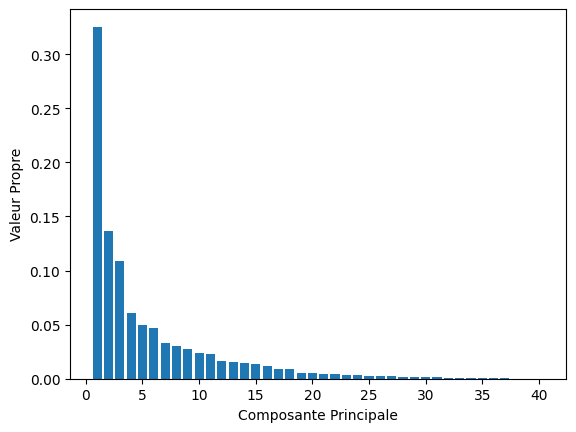

In [ ]:
import matplotlib.pyplot as plt
# Extraire les valeurs propres calculées
# Normaliser les valeurs propres
# Visualiser les valeurs propres normalisées sous forme de scree plot
eigenvalues = pca.explained_variance_
eigenvalues_standardised = [eig/sum(eigenvalues) for eig in eigenvalues]
plt.bar(range(1, len(eigenvalues) + 1), eigenvalues_standardised)
plt.xlabel('Composante Principale')
plt.ylabel('Valeur Propre')
plt.show()

Les observation peuvent être projetées sur le plan défini par les deux premières composantes principales.

<ipython-input-5-2c0f336655b7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pc_df_2d['pluie.demain'] = data['pluie.demain'].values


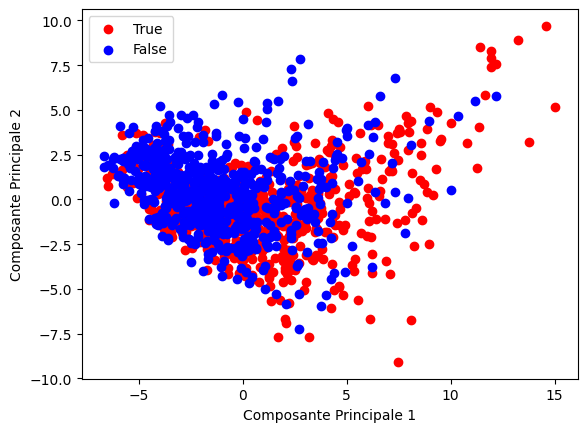

In [ ]:
import seaborn as sns
# Ajouter la variable "pluie.demain" au dataframe contenant les composantes
# Visualiser les observations sur le plan défini par les deux premières composantes principales
# en les distinguant selon les deux modalités de "pluie.demain"
pc_df_2d = pc_df[['PC1', 'PC2']]

# Ajoutez la variable "pluie.demain" au DataFrame pc_df_2d
pc_df_2d['pluie.demain'] = data['pluie.demain'].values

# Créez un dictionnaire de couleurs pour chaque modalité de la variable "pluie.demain"
colors = {True: 'red', False: 'blue'}  # Remplacez les noms de modalités et les couleurs

# Créez un scatter plot en utilisant les composantes principales PC1 et PC2
for modalite, color in colors.items():
    subset = pc_df_2d[pc_df_2d['pluie.demain'] == modalite]
    plt.scatter(subset['PC1'], subset['PC2'], label=modalite, color=color)

# Ajoutez des étiquettes d'axe et une légende
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.legend()

# Affichez le graphique
plt.show()


Les variables originelles peuvent également être visualisées en fonction des deux premières composantes principales.

In [ ]:
pca.components_.shape

(40, 40)

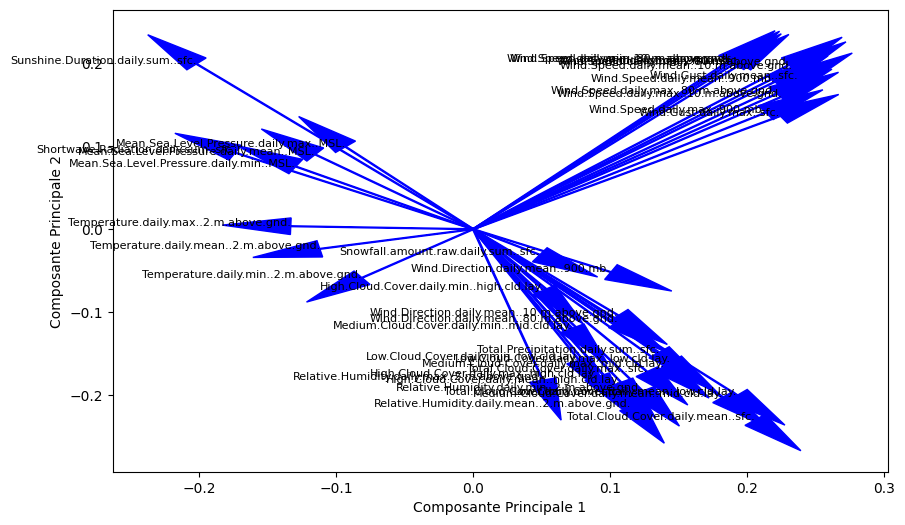

In [ ]:
# Tracer les variables originelles sur le plan défini par les deux premières composantes principales

import matplotlib.pyplot as plt

# Assurez-vous que vous avez déjà effectué l'ACP comme décrit précédemment

# Créez un DataFrame contenant les deux premières composantes principales
pc_df_2d = pc_df[['PC1', 'PC2']]

# Créez un graphique de dispersion pour les composantes principales PC1 et PC2
plt.figure(figsize=(10, 6))  # Ajustez la taille de la figure selon vos préférences

# Ajoutez les flèches représentant les variables originales
for i, column in enumerate(data_dropped.columns):  # Excluez la dernière colonne si elle est l'étiquette "pluie.demain"
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], head_width=0.02, head_length=0.05, fc='blue', ec='blue')
    plt.annotate(column, (pca.components_[0, i], pca.components_[1, i]), fontsize=8, ha='right')

# Ajoutez des étiquettes d'axe
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')

# Affichez le graphique

plt.show()

